In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib
import warnings
import itertools
import plotly.graph_objects as go

# Assigning the input files
df_gender = pd.read_csv('C:\Sujata\CompScience\Fall 2020\IS 5800\Project\Enter_korea_by_gender.csv')
df_purpose = pd.read_csv('C:\Sujata\CompScience\Fall 2020\IS 5800\Project\Enter_korea_by_purpose.csv')
df_age = pd.read_csv('C:\Sujata\CompScience\Fall 2020\IS 5800\Project\Enter_korea_by_age.csv')

df_gender.head()

date     nation  visitor     growth      share    male  female  crewman
0  2019-1      China   392814  28.737870  35.555117  147511  231722    13581
1  2019-1      Japan   206526  23.606830  18.693468   75070  129029     2427
2  2019-1     Taiwan    87954  16.003693   7.961057   30805   56202      947
3  2019-1  Hong Kong    35896   3.533212   3.249086   12172   22729      995
4  2019-1      Macao     2570 -12.376406   0.232621     748    1787       35

In [2]:
df_purpose.head()

date     nation  visitor     growth      share  tourism  business  \
0  2019-1      China   392814  28.737870  35.555117   320113      2993   
1  2019-1      Japan   206526  23.606830  18.693468   198805      2233   
2  2019-1     Taiwan    87954  16.003693   7.961057    86393        74   
3  2019-1  Hong Kong    35896   3.533212   3.249086    34653        59   
4  2019-1      Macao     2570 -12.376406   0.232621     2506         2   

   official affairs  studying  others  
0               138      8793   60777  
1               127       785    4576  
2                22       180    1285  
3                 2        90    1092  
4                 0        17      45

In [3]:
df_age.head()

date     nation  visitor     growth      share  age0-20  age21-30  \
0  2019-1      China   392814  28.737870  35.555117    36520    108591   
1  2019-1      Japan   206526  23.606830  18.693468    18015     57921   
2  2019-1     Taiwan    87954  16.003693   7.961057    18888     17927   
3  2019-1  Hong Kong    35896   3.533212   3.249086     3890     11384   
4  2019-1      Macao     2570 -12.376406   0.232621      223      1013   

   age31-40  age41-50  age51-60  age61  
0    103657     48574     40893  40998  
1     34165     39811     33857  20330  
2     18595     18862      8169   4566  
3      7400      5461      4629   2137  
4       762       264       181     92

In [4]:
# Merging all the 3 files
df = pd.merge(df_purpose, df_gender, on=['date', 'nation', 'visitor', 'growth', 'share'])
df = pd.merge(df, df_age, on=['date', 'nation', 'visitor', 'growth', 'share'])


# World plot for nation and visitors

df_nation = df.groupby(['nation'])['visitor'].sum().reset_index().sort_values(by=['visitor'], ascending=False)

fig = go.Figure(data=go.Choropleth(
     locations=df_nation['nation'], # Spatial coordinates
     z=df_nation['visitor'].astype(int), # Data to be color-coded
     locationmode = 'country names', # set of locations match entries in `locations`
     colorscale = 'viridis',
     colorbar_title = "Visitor Count"
     ))
fig.update_geos(projection_type="natural earth")
fig.update_layout(
     title_text = 'Visitors from different nations to Korea from Jan 2019 to April 2020')

In [5]:
# Shows which nation has the higest number of in 16 month period
df_nation.head()

nation  visitor
12      China  6629318
27      Japan  3695581
52     Taiwan  1424629
56        USA  1170719
20  Hong Kong   783159

In [6]:
# Get e close look at the data Enter_Korea_by_gender.csv
df_gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     960 non-null    object 
 1   nation   960 non-null    object 
 2   visitor  960 non-null    int64  
 3   growth   960 non-null    float64
 4   share    960 non-null    float64
 5   male     960 non-null    int64  
 6   female   960 non-null    int64  
 7   crewman  960 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 60.1+ KB


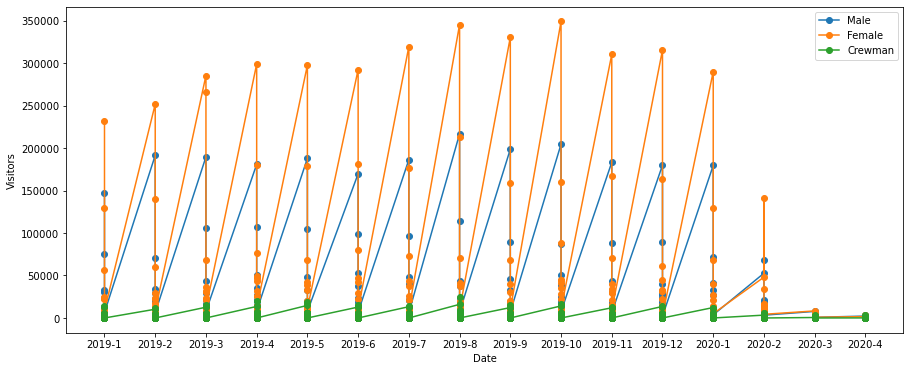

In [7]:
# Plot the visitor vs date for the whole gender dataset
fig, ax=plt.subplots(figsize=(15,6))
ax.plot(df_gender.date, df_gender.male, marker="o", label="Male")
ax.plot(df_gender.date, df_gender.female, marker="o", label="Female")
ax.plot(df_gender.date, df_gender.crewman, marker="o", label="Crewman")
ax.set_xlabel("Date")
ax.set_ylabel("Visitors")
ax.legend(loc=1)

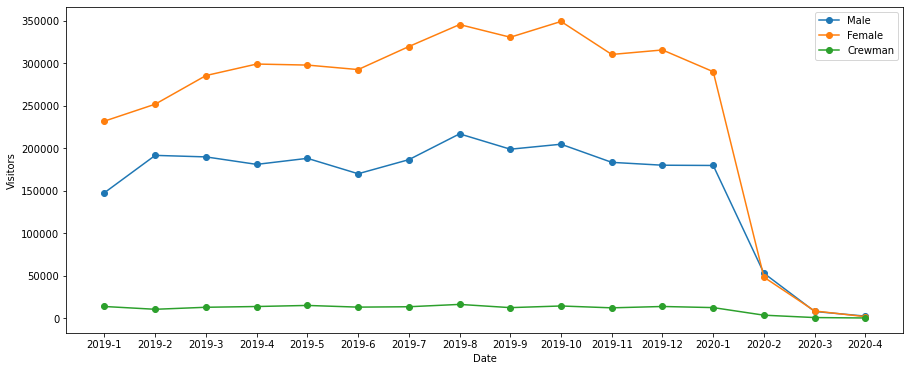

In [8]:
# Reducing the nation to just 1 - China
# Filtering nation = China
df_gender_china = df_gender.loc[df_gender['nation'] == 'China']

#Again Plotting visitor vs date but with nation as China
fig, ax=plt.subplots(figsize=(15,6))
ax.plot(df_gender_china.date, df_gender_china.male, marker="o", label="Male")
ax.plot(df_gender_china.date, df_gender_china.female, marker="o", label="Female")
ax.plot(df_gender_china.date, df_gender_china.crewman, marker="o", label="Crewman")
ax.set_xlabel("Date")
ax.set_ylabel("Visitors")
ax.legend(loc=1)

In [9]:
# Get e close look at the data Enter_Korea_by_age.csv
df_age.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      960 non-null    object 
 1   nation    960 non-null    object 
 2   visitor   960 non-null    int64  
 3   growth    960 non-null    float64
 4   share     960 non-null    float64
 5   age0-20   960 non-null    int64  
 6   age21-30  960 non-null    int64  
 7   age31-40  960 non-null    int64  
 8   age41-50  960 non-null    int64  
 9   age51-60  960 non-null    int64  
 10  age61     960 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 82.6+ KB


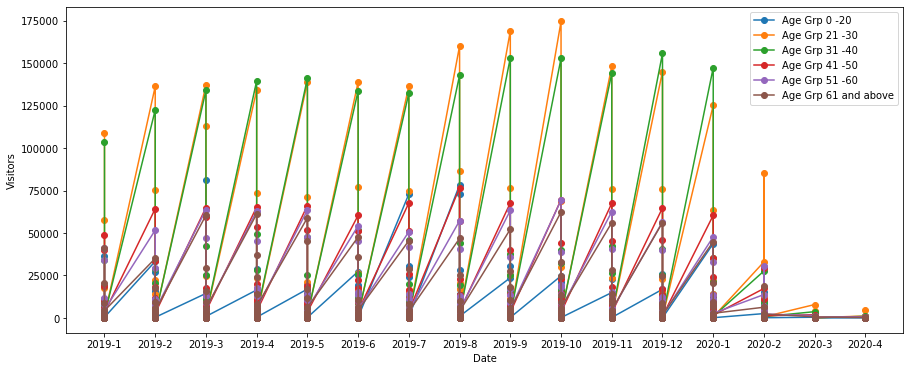

In [10]:
# The age column names are discontinuous so chaning the column names
df_age = df_age.rename(columns = {"age0-20":"age0_20", "age21-30":"age21_30", "age31-40":"age31_40", "age41-50":"age41_50",
                                              "age51-60":"age51_60"})

# Plot the visitor vs date for the whole age dataset
fig, ax=plt.subplots(figsize=(15,6))
ax.plot(df_age.date, df_age.age0_20, marker="o", label="Age Grp 0 -20")
ax.plot(df_age.date, df_age.age21_30, marker="o", label="Age Grp 21 -30")
ax.plot(df_age.date, df_age.age31_40, marker="o", label="Age Grp 31 -40")
ax.plot(df_age.date, df_age.age41_50, marker="o", label="Age Grp 41 -50")
ax.plot(df_age.date, df_age.age51_60, marker="o", label="Age Grp 51 -60")
ax.plot(df_age.date, df_age.age61, marker="o", label="Age Grp 61 and above")
ax.set_xlabel("Date")
ax.set_ylabel("Visitors")
ax.legend(loc=1)

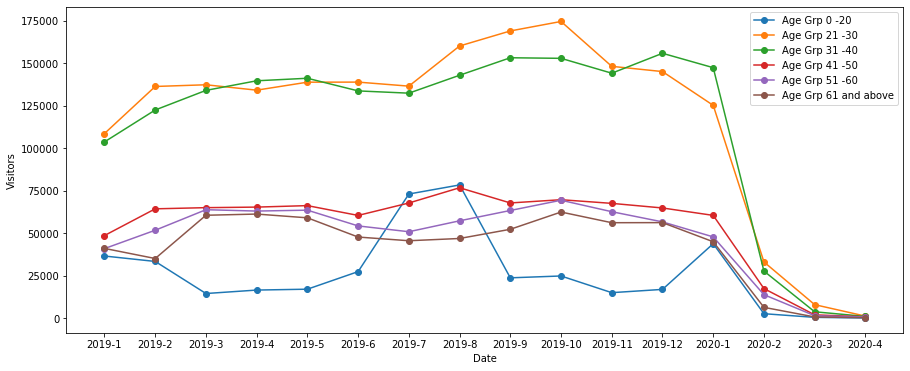

In [11]:
# Filtering nation = China
df_age_china = df_age.loc[df_age['nation'] == 'China']


#Again Plotting visitor vs date but with nation as China

fig, ax=plt.subplots(figsize=(15,6))
ax.plot(df_age_china.date, df_age_china.age0_20, marker="o", label="Age Grp 0 -20")
ax.plot(df_age_china.date, df_age_china.age21_30, marker="o", label="Age Grp 21 -30")
ax.plot(df_age_china.date, df_age_china.age31_40, marker="o", label="Age Grp 31 -40")
ax.plot(df_age_china.date, df_age_china.age41_50, marker="o", label="Age Grp 41 -50")
ax.plot(df_age_china.date, df_age_china.age51_60, marker="o", label="Age Grp 51 -60")
ax.plot(df_age_china.date, df_age_china.age61, marker="o", label="Age Grp 61 and above")
ax.set_xlabel("Date")
ax.set_ylabel("Visitors")
ax.legend(loc=1)


In [12]:
# Get e close look at the data Enter_Korea_by_purpose.csv
df_purpose.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              960 non-null    object 
 1   nation            960 non-null    object 
 2   visitor           960 non-null    int64  
 3   growth            960 non-null    float64
 4   share             960 non-null    float64
 5   tourism           960 non-null    int64  
 6   business          960 non-null    int64  
 7   official affairs  960 non-null    int64  
 8   studying          960 non-null    int64  
 9   others            960 non-null    int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 75.1+ KB


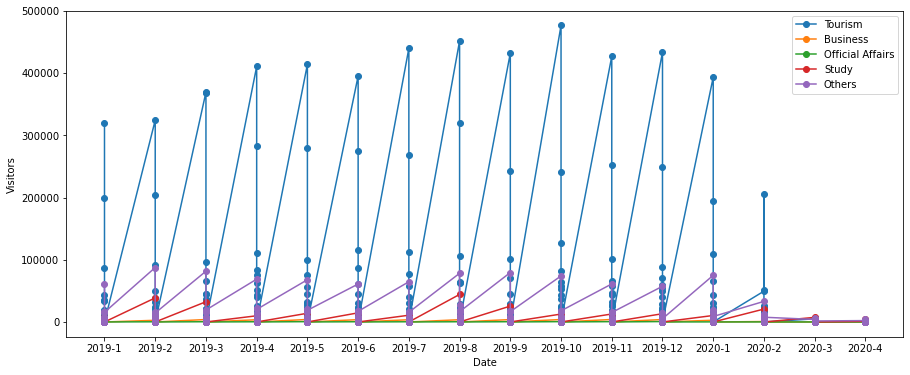

In [13]:
# The Official affairs column name is discontinuous so chaning the column name
df_purpose = df_purpose.rename(columns = {"official affairs":"official_affairs"})

# Plot the visitor vs date for the whole purpose dataset but with nation as China
fig, ax=plt.subplots(figsize=(15,6))
ax.plot(df_purpose.date, df_purpose.tourism, marker="o", label="Tourism")
ax.plot(df_purpose.date, df_purpose.business, marker="o", label="Business")
ax.plot(df_purpose.date, df_purpose.official_affairs, marker="o", label="Official Affairs")
ax.plot(df_purpose.date, df_purpose.studying, marker="o", label="Study")
ax.plot(df_purpose.date, df_purpose.others, marker="o", label="Others")
ax.set_xlabel("Date")
ax.set_ylabel("Visitors")
ax.legend(loc=1)

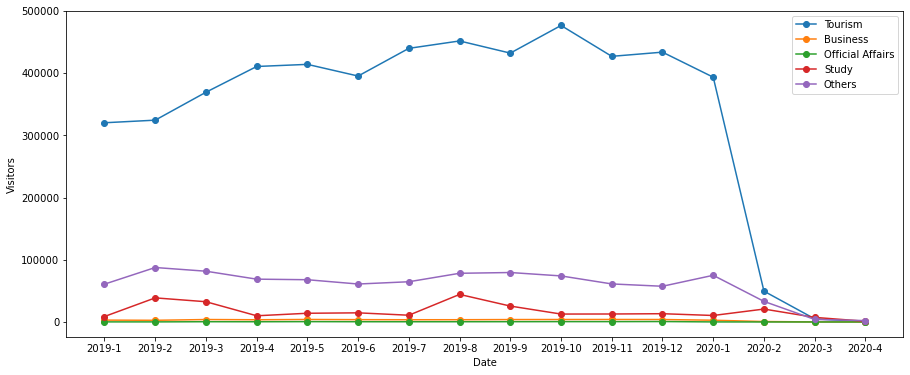

In [14]:
# Filtering nation = China
df_purpose_china = df_purpose.loc[df_purpose['nation'] == 'China']


# Plot the visitor vs date for the whole purpose dataset but with nation as China
fig, ax=plt.subplots(figsize=(15,6))
ax.plot(df_purpose_china.date, df_purpose_china.tourism, marker="o", label="Tourism")
ax.plot(df_purpose_china.date, df_purpose_china.business, marker="o", label="Business")
ax.plot(df_purpose_china.date, df_purpose_china.official_affairs, marker="o", label="Official Affairs")
ax.plot(df_purpose_china.date, df_purpose_china.studying, marker="o", label="Study")
ax.plot(df_purpose_china.date, df_purpose_china.others, marker="o", label="Others")
ax.set_xlabel("Date")
ax.set_ylabel("Visitors")
ax.legend(loc=1)

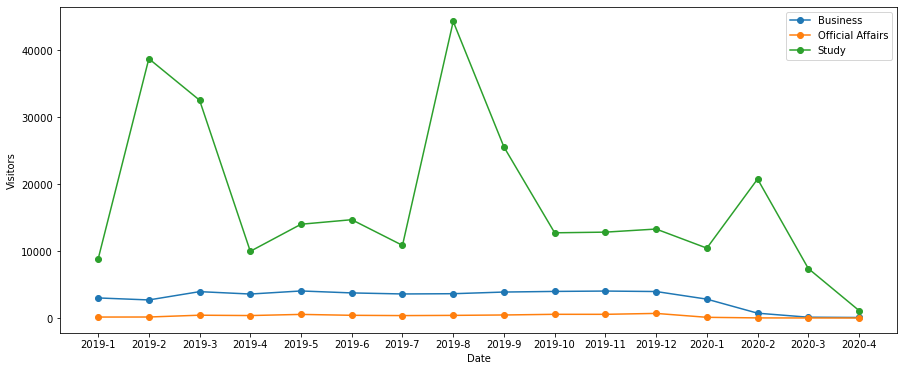

In [15]:
# To get a closer look at the business, Studying and official affairs data
fig, ax=plt.subplots(figsize=(15,6))
ax.plot(df_purpose_china.date, df_purpose_china.business, marker="o", label="Business")
ax.plot(df_purpose_china.date, df_purpose_china.official_affairs, marker="o", label="Official Affairs")
ax.plot(df_purpose_china.date, df_purpose_china.studying, marker="o", label="Study")
ax.set_xlabel("Date")
ax.set_ylabel("Visitors")
ax.legend(loc=1)

pd.options.mode.chained_assignment = None  # default='warn'

In [16]:
##Perform some preprocessing on the above files##

# Grouping the visitor data into 3 groups: ageBelow_30, age30_50 and age50_above
df_age_china['ageBelow_30'] = df_age_china['age0_20'] + df_age_china['age21_30']
df_age_china['age30_50'] = df_age_china['age31_40'] + df_age_china['age41_50']
df_age_china['age51_above'] = df_age_china['age51_60'] + df_age_china['age61']
df_age_china = df_age_china.drop(columns=['age0_20', 'age21_30', 'age31_40', 'age41_50', 'age51_60', 'age61'])

df_age_china.head()

date nation  visitor     growth      share  ageBelow_30  age30_50  \
0    2019-1  China   392814  28.737870  35.555117       145111    152231   
60   2019-2  China   453379  31.284441  37.724933       169605    186727   
120  2019-3  China   487623  20.874389  31.753711       151730    198946   
180  2019-4  China   493250  34.545722  30.166978       150594    204919   
240  2019-5  China   500413  35.165657  33.682331       155808    207275   

     age51_above  
0          81891  
60         86746  
120       124277  
180       124173  
240       122500

In [17]:
# Grouping the visitor data into 2 groups: Tourism and Non-Tourism
df_purpose_china['non_tourism'] = df_purpose_china['others'] + df_purpose_china['studying'] + df_purpose_china['business'] + df_purpose_china['official_affairs']
df_purpose_china = df_purpose_china.drop(columns=['others', 'studying', 'business', 'official_affairs'])

df_purpose_china.head()

date nation  visitor     growth      share  tourism  non_tourism
0    2019-1  China   392814  28.737870  35.555117   320113        72701
60   2019-2  China   453379  31.284441  37.724933   324291       129088
120  2019-3  China   487623  20.874389  31.753711   369165       118458
180  2019-4  China   493250  34.545722  30.166978   410542        82708
240  2019-5  China   500413  35.165657  33.682331   413949        86464

In [18]:
# Merging all the 3 files
nation_china = pd.merge(df_purpose_china, df_gender_china, on=['date','visitor'])
nation_china = pd.merge(nation_china, df_age_china, on=['date', 'visitor'])

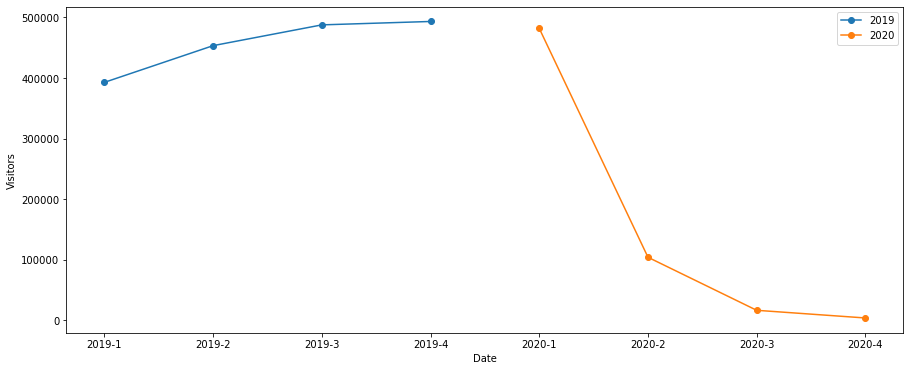

In [19]:
#Comparing the 4 commom months in both years w.r.t to visitors
filter_list1 = ['2020-1', '2020-2', '2020-3', '2020-4']
nation_china_2020 = nation_china[nation_china.date.isin(filter_list1)]

filter_list2 = ['2019-1', '2019-2', '2019-3', '2019-4']
nation_china_2019 = nation_china[nation_china.date.isin(filter_list2)]

fig, ax=plt.subplots(figsize=(15,6))
ax.plot(nation_china_2019.date, nation_china_2019.visitor, marker="o", label="2019")
ax.plot(nation_china_2020.date, nation_china_2020.visitor, marker="o", label="2020")
ax.set_xlabel("Date")
ax.set_ylabel("Visitors")
ax.legend(loc=1)
plt.show()

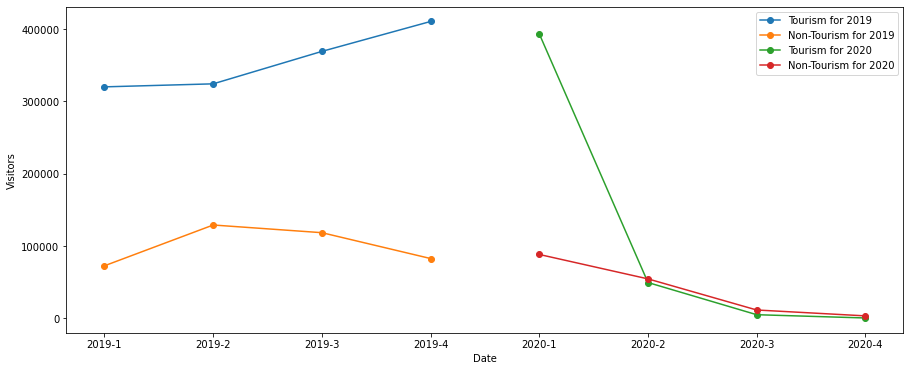

In [20]:
#Comparing the 4 commom months in both years w.r.t to purpose

fig, ax=plt.subplots(figsize=(15,6))
ax.plot(nation_china_2019.date, nation_china_2019.tourism, marker="o", label="Tourism for 2019")
ax.plot(nation_china_2019.date, nation_china_2019.non_tourism, marker="o", label="Non-Tourism for 2019")
ax.plot(nation_china_2020.date, nation_china_2020.tourism, marker="o", label="Tourism for 2020")
ax.plot(nation_china_2020.date, nation_china_2020.non_tourism, marker="o", label="Non-Tourism for 2020")
ax.set_xlabel("Date")
ax.set_ylabel("Visitors")
ax.legend(loc=1)
plt.show()

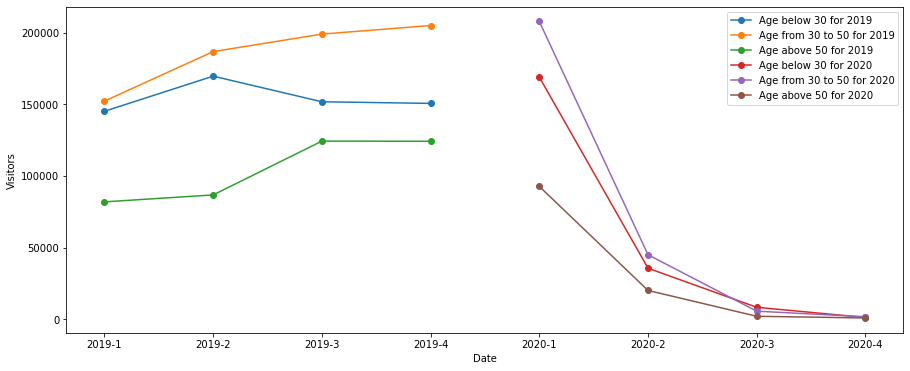

In [21]:
#Comparing the 4 commom months in both years w.r.t to age

fig, ax=plt.subplots(figsize=(15,6))
ax.plot(nation_china_2019.date, nation_china_2019.ageBelow_30, marker="o", label="Age below 30 for 2019")
ax.plot(nation_china_2019.date, nation_china_2019.age30_50, marker="o", label="Age from 30 to 50 for 2019")
ax.plot(nation_china_2019.date, nation_china_2019.age51_above, marker="o", label="Age above 50 for 2019")
ax.plot(nation_china_2020.date, nation_china_2020.ageBelow_30, marker="o", label="Age below 30 for 2020")
ax.plot(nation_china_2020.date, nation_china_2020.age30_50, marker="o", label="Age from 30 to 50 for 2020")
ax.plot(nation_china_2020.date, nation_china_2020.age51_above, marker="o", label="Age above 50 for 2020")
ax.set_xlabel("Date")
ax.set_ylabel("Visitors")
ax.legend(loc=1)
plt.show()

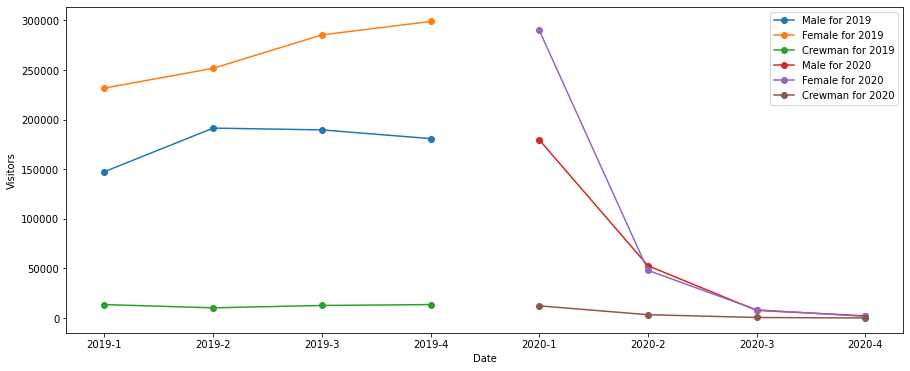

In [22]:
#Comparing the 4 commom months in both years w.r.t to gender

fig, ax=plt.subplots(figsize=(15,6))
ax.plot(nation_china_2019.date, nation_china_2019.male, marker="o", label="Male for 2019")
ax.plot(nation_china_2019.date, nation_china_2019.female, marker="o", label="Female for 2019")
ax.plot(nation_china_2019.date, nation_china_2019.crewman, marker="o", label="Crewman for 2019")
ax.plot(nation_china_2020.date, nation_china_2020.male, marker="o", label="Male for 2020")
ax.plot(nation_china_2020.date, nation_china_2020.female, marker="o", label="Female for 2020")
ax.plot(nation_china_2020.date, nation_china_2020.crewman, marker="o", label="Crewman for 2020")
ax.set_xlabel("Date")
ax.set_ylabel("Visitors")
ax.legend(loc=1)
plt.show()